In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft,fftfreq
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [154]:
x_train = pd.read_csv("Dataset2/Train/Voltage_L1_train.csv")
y_train = pd.read_csv("Dataset2/Train/output_train.csv")
x_test = pd.read_csv("Dataset2/Test/Voltage_L1_test.csv")
y_test = pd.read_csv("Dataset2/Test/output_test.csv")

In [155]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (5999, 256)
y_train (5999, 1)
x_test (3599, 256)
y_test (3599, 1)


In [156]:
header =[]
for i in range(1,x_train.shape[1]+1):
    header.append("Col"+str(i))


In [157]:
x_train.columns = header
x_test.columns = header

In [158]:
header = ["output"]
y_train.columns = header
y_test.columns = header

In [159]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [160]:
X_train = np.zeros((x_train.shape[0],256))
X_test = np.zeros((x_test.shape[0],256))

for i in range(0,x_train.shape[0]):
    for j in range(0,256):
         X_train[i][j] = x_train[i][j]#+x_train[i][255-j]

for i in range(0,x_test.shape[0]):
    for j in range(0,256):
        X_test[i][j] = x_test[i][j]#+x_test[i][255-j]
    

In [161]:
print(X_train.shape)
X_train

(5999, 256)


array([[  573.65248593,  1003.34373648,  1588.40452538, ...,
        -1282.04202542,  -601.96821659,  -156.84836664],
       [ 4757.36518327,  5264.59891169,  5428.64248572, ...,
         3619.932691  ,  4008.28870092,  4422.22991059],
       [ 4242.14482442,  4644.67940194,  5013.35653196, ...,
         2776.87647883,  3248.63866156,  3807.66514927],
       ...,
       [ 1485.94779922,  2041.5379421 ,  2367.32480724, ...,
         -237.3423146 ,   556.56248086,   926.09925001],
       [ 4025.19475135,  4447.71331547,  4611.03018167, ...,
         2641.23922599,  3349.20935637,  3617.41815441],
       [ 2560.1815105 ,  2821.35568255,  3345.0992971 , ...,
          692.19105176,  1654.35127069,  1782.78233314]])

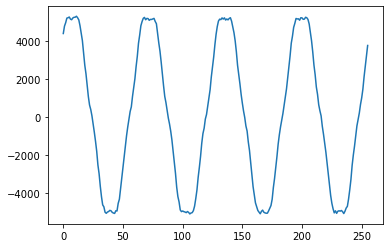

In [164]:
plt.plot([i for i in range(0,256)], X_train[1101][:])

In [165]:
for i in range(0,X_train.shape[0]):
    X_train[i][0:256] = fft(X_train[i][0:256])
    
for i in range(0,X_test.shape[0]):
    X_test[i][0:256] = fft(X_test[i][0:256])

<ipython-input-165-de7d35f0cb67>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  X_train[i][0:256] = fft(X_train[i][0:256])
<ipython-input-165-de7d35f0cb67>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  X_test[i][0:256] = fft(X_test[i][0:256])


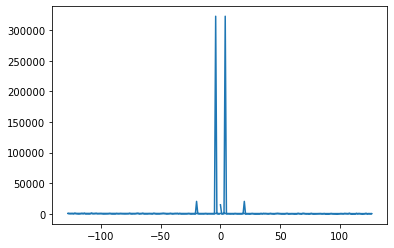

In [166]:
yf = X_train[1686][:]
xf = fftfreq(256,1/256)
plt.plot(xf, np.abs(yf))
plt.show()

In [167]:
transform = StandardScaler()
X_train = transform.fit_transform(X_train)
X_test = transform.fit_transform(X_test)

In [168]:
y_train_hot = pd.get_dummies(y_train['output'])
y_test_hot = pd.get_dummies(y_test['output'])

In [169]:
y_train = y_train_hot.to_numpy()
y_test = y_test_hot.to_numpy()
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
no_of_classes = y_train.shape[1]
#print(no_of_classes)

y_train: (5999, 6)
y_test: (3599, 6)


In [170]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [171]:
model = Sequential()
model.add(Dense(64, input_shape=(256,), activation = 'relu'))
#model.add(Dense(32, activation = 'relu'))
#model.add(Dropout(0.6))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [172]:
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
75/75 [==============================] - 1s 4ms/step - loss: 1.7536 - accuracy: 0.3115 - val_loss: 1.0048 - val_accuracy: 0.7133
Epoch 2/30
75/75 [==============================] - 0s 2ms/step - loss: 0.8094 - accuracy: 0.7955 - val_loss: 0.6349 - val_accuracy: 0.8450
Epoch 3/30
75/75 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.8774 - val_loss: 0.4805 - val_accuracy: 0.8750
Epoch 4/30
75/75 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.9123 - val_loss: 0.4015 - val_accuracy: 0.8933
Epoch 5/30
75/75 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.9328 - val_loss: 0.3488 - val_accuracy: 0.9100
Epoch 6/30
75/75 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.9436 - val_loss: 0.3182 - val_accuracy: 0.9175
Epoch 7/30
75/75 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.9510 - val_loss: 0.2942 - val_accuracy: 0.9242
Epoch 8/30
75/75 [==

In [173]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 390       
Total params: 16,838
Trainable params: 16,838
Non-trainable params: 0
_________________________________________________________________


In [174]:
pred_acc = model.evaluate(X_test,y_test)
print("Test accuracy is {}".format(pred_acc))

113/113 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.9272
Test accuracy is [0.24476535618305206, 0.9272019863128662]
